# Analysis of hip ROIs

In [1]:
import os
import matplotlib.pyplot as plt

from wikisim import rsa
from wikisim import figures

rsa_dir = '/Users/morton/Dropbox/work/bender/batch/rsa'
fig_dir = '/Users/morton/Dropbox/work/bender/figs_wikisim3/rois'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# controls plot precision; use 1000 for testing, 100000 for final
opt = {'n_perm': 100000, 'n_boot': 100000, 
       'max_offset': 4, 'sig_offset': 3.5}
figsize = (4, 2.5)

rois = rsa.define_network(
    ['hmx_use_face_hip_dil2', 'hmx_use_scene_hip_dil2'],
    ['Person cluster', 'Place cluster'], [0, 0],
    ['cluster1', 'cluster2'], ['cluster1', 'cluster2']
)

## Face semantics

Controlling for just the visual model, adding gender, and adding occupation.

In [2]:
zstat_face_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'face', rois
)
zstat_face_hmx_sub_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_use', 'face', rois
)
zstat_face_hmx_sub_occ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_occ_use', 'face', rois
)

,mean,sem,std,p,p_cor,d
Person cluster,0.509107,0.161624,0.928457,0.001730,0.001220,0.548337
Place cluster,-0.057071,0.167956,0.964835,0.631764,0.627469,0.059151


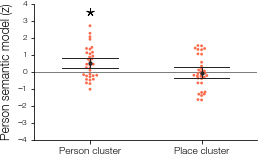

In [3]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_sub_use, 'wiki_use1', 'face', ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_use.pdf'))
sig

,mean,sem,std,p,p_cor,d
Person cluster,0.515496,0.122580,0.704166,0.000120,0.001525,0.732066
Place cluster,-0.013042,0.195262,1.121694,0.523805,0.530685,0.011627


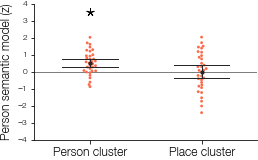

In [4]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_sub_occ_use, 'wiki_use1', 'face', ax=ax, **opt
)
ax.tick_params(axis='x', labelsize='large')
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_occ_use.pdf'))
sig

## Scene semantics

Controlling for just the visual model, then adding visual category and subcategory.

In [5]:
zstat_scene_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'scene', rois
)
zstat_scene_hmx_sub_typ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_typ_use', 'scene', rois
)

,mean,sem,std,p,p_cor,d
Person cluster,0.152310,0.178970,1.028107,0.200848,0.188158,0.148146
Place cluster,0.401854,0.145703,0.837002,0.003870,0.007495,0.480112


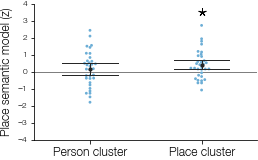

In [6]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_sub_typ_use, 'wiki_use1', 'scene', ax=ax, **opt
)
ax.tick_params(axis='x', labelsize='large')
fig.savefig(os.path.join(fig_dir, 'prsa_hip_scene_sub_typ_use.pdf'))
sig